# Feature Engineering

Notebook supporting the [**Do we know our data, as good as we know our tools** talk](https://devoxxuk19.confinabox.com/talk/VEM-8021/Do_we_know_our_data_as_good_as_we_know_our_tools%3F) at [Devoxx UK 2019](http://twitter.com/@DevoxxUK).

The contents of the notebook is inspired by many sources.


### High-level steps covered:

- Find hidden information
  - feature extraction
  - applying math/statistical functions [DEMO - WALKTHRU]
  - apply physics functions
- Deal with too much data
  - dimensionality reduction
  - feature selection [DEMO - WALKTHRU]
- Statistical Inference 


### Resources

- [Basic Feature Engineering With Time Series Data in Python](http://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/)
- [Zillow Prize - EDA, Data Cleaning & Feature Engineering](https://www.kaggle.com/lauracozma/eda-data-cleaning-feature-engineering)
- [Feature-wise transformations](https://distill.pub/2018/feature-wise-transformations)
- [tsfresh - tsfresh is used to to extract characteristics from time series](https://tsfresh.readthedocs.io/en/latest/text/introduction.html)
- [featuretools - an open source python framework for automated feature engineering](https://github.com/featuretools/featuretools/)
- [Synthetic features and outliers notebook](https://colab.research.google.com/notebooks/mlcc/synthetic_features_and_outliers.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=syntheticfeatures-colab&hl=en#scrollTo=jnKgkN5fHbGy)
- [Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)
- **[Useful cheatsheets](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/README-details.md#cheatsheets)**

Please refer to the [Slides](http://bit.ly/do-we-know-our-data) for the step here after.

### Why?

Ask all the questions you should ask with regards to the domain and related domains or sub-domains.

It is a good idea to know the **why** part of the action, why are we doing what we are doing with the data, see the [five whys](https://en.wikipedia.org/wiki/5_Whys).

Some ideas (of course, please come up with your own as well):

- To find hidden information
- To extract the essence of the data which is representative of the rest
of the data
- Improve training efficiency: accuracy, speed, good use of resources

#### Load Your Data

In [22]:
%%bash
if [[ ! -s boston_housing_dataset.zip ]]; then
    curl -O -L https://github.com/neomatrix369/awesome-ai-ml-dl/releases/download/v0.1/boston_housing_dataset.zip
fi

unzip -o boston_housing_dataset.zip

Archive:  boston_housing_dataset.zip
  inflating: column.header           
  inflating: housing-unclean.csv     
  inflating: housing.csv             
  inflating: housing.names           


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

names = [line.strip() for line in open("column.header", 'r')]
data = pd.read_csv("housing.csv", names=names)

print("Names and descriptions of the fields of the Boston Housing dataset can be found at")
print("https://github.com/jbrownlee/Datasets/blob/master/housing.names")
print("")
!cat housing.names

Names and descriptions of the fields of the Boston Housing dataset can be found at
https://github.com/jbrownlee/Datasets/blob/master/housing.names

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns hous

let's set a baseline to evaluate our attempts to improve our model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def evaluateModelOnDataset(data):
    X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'medv'].values, data["medv"].values, test_size=0.33, random_state=42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

def evaluateModelOnTrainingAndTestSets(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)
evaluateModelOnDataset(data)

0.7261570836552489

### Find hidden information

- feature extraction
- applying math/statistical functions
- apply physics functions 

#### Feature extraction

- group together sparse classes
- create new calculated columns, for e.g. extracting weekday from date
- generate relevant labels with the help of results from clustering



#### Applying math/statistical functions [DEMO - WALKTHRU]

- convert to absolute values
- apply root mean square
- use logarithmic functions
- applying rolling mean / stddev / min / max 

And manage precision of the data!


We observed earlier than there was a correlation between lstat and medv.

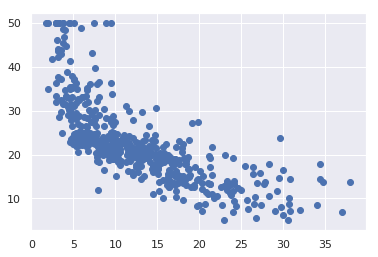

In [25]:
plt.scatter(data["lstat"], data["medv"], marker='o')
plt.show()

>when we plot lstat (used -lstat in the second plot to make it more obvious) in function of medv, we see an **exponential curve**.

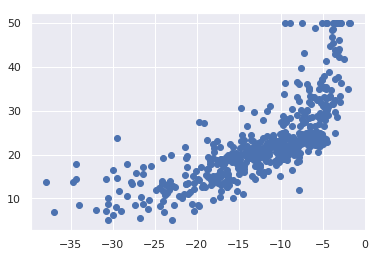

In [26]:
plt.scatter(-data["lstat"], data["medv"], marker='o')
plt.show()

>We apply **logarithm function** to it to convert it into a linear correlation and make it easier for our model to pick the correlation.

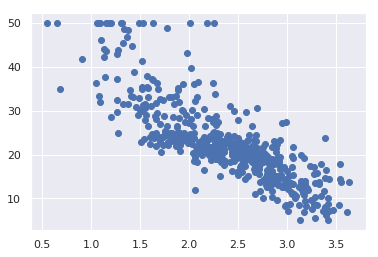

In [27]:
data_engineered=data.copy()
data_engineered["lstat"]=np.log(data_engineered["lstat"])
plt.scatter(data_engineered["lstat"], data_engineered["medv"], marker='o')
plt.show()

In [28]:
print("previous accuracy: %f" % evaluateModelOnDataset(data))
print("new accuracy: %f" % evaluateModelOnDataset(data_engineered))


previous accuracy: 0.726157
new accuracy: 0.772251


>we can gain more than 4% in accuracy with this transformation.

#### Apply physics functions
- Energy
- Energy rate
- Short Term Average / Long term Avg
- Kurtosis
- FFT (Fast Fourier Transform)


#### Feature scaling
- Standardization
- Normalization
- map to uniform / gaussian distribution


In [29]:
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'medv'].values, data["medv"].values, test_size=0.33, random_state=42)
X_train_normalized=preprocessing.normalize(X_train)
X_test_normalized=preprocessing.normalize(X_test)
X_train_standardized=preprocessing.scale(X_train)
X_test_standardized=preprocessing.scale(X_test)

In [30]:
print("baseline accuracy: %f" % evaluateModelOnTrainingAndTestSets(X_train, X_test, y_train, y_test))
print("new accuracy for standardized data: %f" % evaluateModelOnTrainingAndTestSets(X_train_standardized, X_test_standardized, y_train, y_test))
print("new accuracy for normalized data: %f" % evaluateModelOnTrainingAndTestSets(X_train_normalized, X_test_normalized, y_train, y_test))

baseline accuracy: 0.726157
new accuracy for standardized data: 0.704179
new accuracy for normalized data: 0.739282


>We can gain 1% in accuracy with normalization

### Deal with too many features / too much data

- dimensionality reduction
- feature selection

#### Dimensionality reduction

- Factorisation 
    - PCA Principal Component Analysis
- ICA 
Independent Component Analysis
- t-SNE 
t-Distributed Stochastic Neighbour Embedding
- UMAP 
Uniform Manifold Approximation and Projection

#### Correlation Between Attributes

Correlation refers to the relationship between two variables and how they may or may not change together.

#### Feature selection [DEMO - WALKTHRU]

Manual
- Filter out features which are highly correlated.
- Plot multi scatter chart 
- Use correlation table 
- (might need to remove features which were used for extraction)

> given that it's a small dataset, we are not going to yield much better results by removing too many features.

          crim     zn  indus   chas    nox     rm    age    dis    rad    tax  ptratio      b  \
crim     1.000 -0.200  0.407 -0.056  0.421 -0.219  0.353 -0.380  0.626  0.583    0.290 -0.385   
zn      -0.200  1.000 -0.534 -0.043 -0.517  0.312 -0.570  0.664 -0.312 -0.315   -0.392  0.176   
indus    0.407 -0.534  1.000  0.063  0.764 -0.392  0.645 -0.708  0.595  0.721    0.383 -0.357   
chas    -0.056 -0.043  0.063  1.000  0.091  0.091  0.087 -0.099 -0.007 -0.036   -0.122  0.049   
nox      0.421 -0.517  0.764  0.091  1.000 -0.302  0.731 -0.769  0.611  0.668    0.189 -0.380   
rm      -0.219  0.312 -0.392  0.091 -0.302  1.000 -0.240  0.205 -0.210 -0.292   -0.356  0.128   
age      0.353 -0.570  0.645  0.087  0.731 -0.240  1.000 -0.748  0.456  0.506    0.262 -0.274   
dis     -0.380  0.664 -0.708 -0.099 -0.769  0.205 -0.748  1.000 -0.495 -0.534   -0.232  0.292   
rad      0.626 -0.312  0.595 -0.007  0.611 -0.210  0.456 -0.495  1.000  0.910    0.465 -0.444   
tax      0.583 -0.315  0.721 -

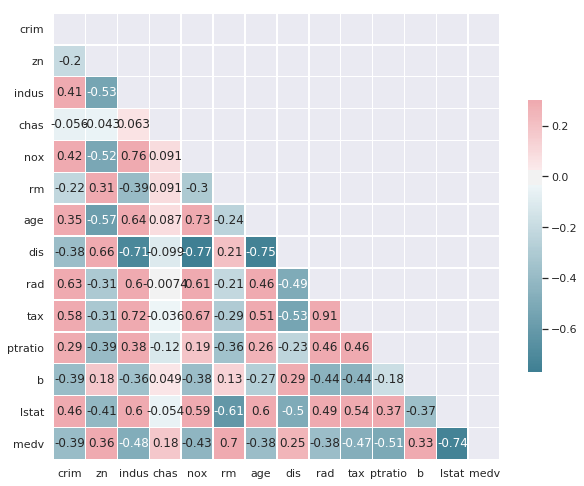

In [31]:
# Pairwise Pearson correlations
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data.corr(method='pearson')
print(correlations)
print()
print("A correlation of -1 or 1 shows a full negative (inverse) or positive (direct) correlation respectively.") 
print("A value of 0 shows no correlation at all.")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
# correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
# sns.heatmap(correlations, annot=True,mask=mask, cmap=cmap)

>The features with high correlations between themselves may lower performances if used together in case of some models (linear regression): 
- tax and rad (0.91)
- dis and nox (-0.77)
- dis and indus (-0.71)
- dis and age (-0.75)

>No feature seems to show any absence of correlation with the target feature

In [32]:
prev_accuracy =evaluateModelOnDataset(data)
print("baseline: %f" % prev_accuracy)
for feature in data.columns:
    if feature!="medv":
        new_accuracy=evaluateModelOnDataset(data.loc[:, data.columns != feature])
        if new_accuracy > prev_accuracy:
            print("accuracy without %s: %f            - improvement" % (feature, new_accuracy))
        else: 
            print("accuracy without %s: %f" % (feature, new_accuracy))


baseline: 0.726157
accuracy without crim: 0.724202
accuracy without zn: 0.714156
accuracy without indus: 0.727770            - improvement
accuracy without chas: 0.725516
accuracy without nox: 0.708281
accuracy without rm: 0.686267
accuracy without age: 0.729383            - improvement
accuracy without dis: 0.689851
accuracy without rad: 0.704817
accuracy without tax: 0.714122
accuracy without ptratio: 0.693525
accuracy without b: 0.729646            - improvement
accuracy without lstat: 0.687862


In [33]:
evaluateModelOnDataset(data.loc[:, (data.columns != "age")&(data.columns != "indus")&(data.columns != "b")])

0.7336244309845095

>Results are not obvious, since probably we have a small dataset. 

>But if we remove age and indus which are highly correlated with dis, we see a small improvement. 
We can gain less than 1% in accuracy by removing a couple of features.

Programmatically
- Tree based feature selection
- Use feature importance from XGBoost or RandomForest


accuracy of randomForest on full dataset: 0.975159


/home/jeremie/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


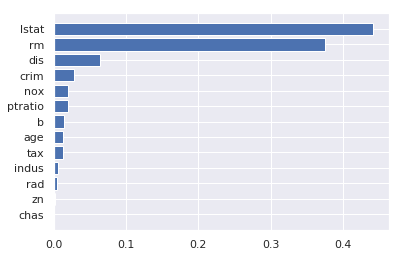

In [34]:
from sklearn.ensemble import RandomForestRegressor


labels=data.loc[:, data.columns != 'medv'].columns.values

model = RandomForestRegressor();
model.fit(data[labels],data["medv"].values);
print("accuracy of randomForest on full dataset: %f" % model.score(data[labels],data["medv"].values));

df_features=pd.DataFrame()
df_features["feature"]=labels
df_features["importance"]=model.feature_importances_
df_features.sort_values(by="importance",inplace=True)

y_pos = np.arange(len(df_features))
plt.barh(y_pos,df_features["importance"])
plt.yticks(y_pos,df_features["feature"])
plt.show()

In [35]:
print("baseline: %f" % evaluateModelOnDataset(data[["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"]]))
print("with top 3 features: %f" % evaluateModelOnDataset(data[["lstat","rm","dis","medv"]]))
print("with last 2 features removed: %f" % evaluateModelOnDataset(data.loc[:, (data.columns != 'chas')&(data.columns != 'zn')]))


baseline: 0.726157
with top 3 features: 0.624183
with last 2 features removed: 0.714106


>We don't get better results by picking the top or removing the last features from Random Forest. It can be explained by the size of the dataset which doesn't require reducing its number of features. 

>We do observe though that the features we removed earlier (indus, b and age) are among the least important features.

### Statistical Inference

- [Understanding statistical inference]() [video]
- [Four ideas of Statistical Inference](http://www.bristol.ac.uk/medical-school/media/rms/red/4_ideas_of_statistical_inference.html)
- [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) [book]
- [Statistical Inference](https://www.coursera.org/learn/statistical-inference) [course]


### Preparatory questions to ask

- Can I create a model from my dataset efficiently given my resources?
- How do we make best use of the trial-error process yet get the best out of the dataset / model?
- How can I make informed decisions and record them and reuse them in my next iteration?
- How can I make sure that the end model is useful to solve my business problem after going through the tedious process?
- From the trends we identified previously can we make it simpler for the model to pick and use such information from the dataset?
- How can I get the essence out of my original dataset ? Can I express the intuitions I got during the analysis in a more obvious way ?

### Please refer to the [Slides](http://bit.ly/do-you-know-your-data) for the step here after.